In [1]:
#Dependecies 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read in the WHR_2023 data
whr_df = pd.read_csv("../Resources/WHR_2023.csv")
whr_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [3]:
#rename columns
whr_df.columns = ["Country", "Year", "Hapiness Score", "GDP p/capita", "Social Support",
                  "Healthy Life Expectancy", "Life Choices Freedom", "Generosity",
                  "Corruption Perceptions", "Positive Affect", "Negative Effect"]
whr_df.head()

,Country,Year,Hapiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [12]:
# Extract years that we are woprking with 
whr_clean_df = whr_df.loc[whr_df["Year"] >= 2016]
whr_clean_df

,Country,Year,Hapiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.044,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.119,0.954,0.435,0.371
10,Afghanistan,2018,2.694,7.631,0.508,53.575,0.374,-0.091,0.928,0.385,0.405
11,Afghanistan,2019,2.375,7.640,0.420,53.900,0.394,-0.106,0.924,0.324,0.502
12,Afghanistan,2021,2.436,7.324,0.454,54.550,0.394,-0.081,0.946,0.179,0.607
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [38]:
#group by year the clean df
grouped_clean_df = whr_clean_df.groupby(["Year"]).mean()
grouped_clean_df

/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_93412/2505941987.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_clean_df = whr_clean_df.groupby(["Year"]).mean()


,Hapiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
Year,,,,,,,,,
2016,5.396447,9.389850,0.811922,63.432117,0.762921,-0.002223,0.747277,0.655830,0.285234
2017,5.460408,9.389575,0.805144,63.570979,0.780603,-0.009007,0.728540,0.648336,0.291212
2018,5.498674,9.390922,0.812170,63.890399,0.783843,-0.028759,0.734571,0.652604,0.292914
2019,5.570965,9.453196,0.816895,64.162590,0.794683,-0.023979,0.723267,0.654585,0.286838
2020,5.727517,9.632044,0.823009,65.541814,0.809800,-0.005325,0.726082,0.664391,0.301704
2021,5.636246,9.596425,0.803959,65.409664,0.788099,0.035417,0.724866,0.653123,0.290180
2022,5.585140,9.523074,0.798009,65.286712,0.790434,0.028491,0.720838,0.656465,0.292491


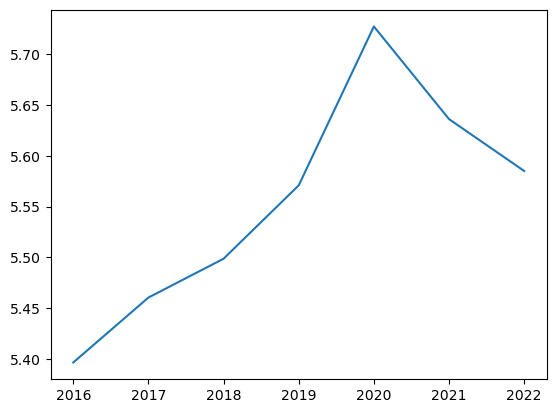

In [42]:
#plot hapiness score over time 2016-2022
x_axis = grouped_clean_df.index
y_axis = grouped_clean_df["Hapiness Score"]
plt.plot(x_axis, y_axis)
plt.xticks(grouped_clean_df.index)
plt.show()

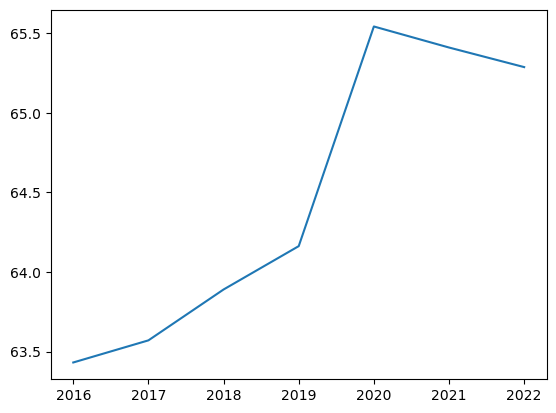

In [43]:
#plot Healthy Life Expectancy score over time 2016-2022
x_axis = grouped_clean_df.index
y_axis = grouped_clean_df["Healthy Life Expectancy"]
plt.plot(x_axis, y_axis)
plt.xticks(grouped_clean_df.index)
plt.show()

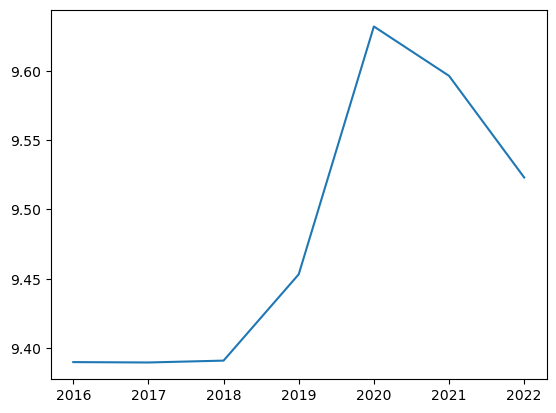

In [44]:
#plot GDP score over time 2016-2022
x_axis = grouped_clean_df.index
y_axis = grouped_clean_df["GDP p/capita"]
plt.plot(x_axis, y_axis)
plt.xticks(grouped_clean_df.index)
plt.show()

In [15]:
# create a new df for pre-pandemic (2016-2019) 
pre_covid_df = whr_clean_df.loc[whr_clean_df["Year"] <= 2019]
pre_covid_df

,Country,Year,Hapiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.044,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.119,0.954,0.435,0.371
10,Afghanistan,2018,2.694,7.631,0.508,53.575,0.374,-0.091,0.928,0.385,0.405
11,Afghanistan,2019,2.375,7.640,0.420,53.900,0.394,-0.106,0.924,0.324,0.502
22,Albania,2016,4.511,9.417,0.638,69.025,0.730,-0.019,0.901,0.567,0.322
...,...,...,...,...,...,...,...,...,...,...,...
2179,Zambia,2019,3.307,8.123,0.638,54.400,0.811,0.078,0.832,0.674,0.394
2192,Zimbabwe,2016,3.735,7.735,0.768,51.675,0.733,-0.079,0.724,0.685,0.209
2193,Zimbabwe,2017,3.638,7.754,0.754,52.150,0.753,-0.081,0.751,0.734,0.224
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212


In [16]:
#create a post-pandemic data frame 
post_covid_df = whr_clean_df.loc[whr_clean_df["Year"] >= 2020]
post_covid_df

,Country,Year,Hapiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
12,Afghanistan,2021,2.436,7.324,0.454,54.550,0.394,-0.081,0.946,0.179,0.607
13,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
26,Albania,2020,5.365,9.492,0.710,69.125,0.754,0.004,0.891,0.563,0.265
27,Albania,2021,5.255,9.583,0.702,69.150,0.827,0.041,0.896,0.554,0.254
28,Albania,2022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846,0.547,0.255
...,...,...,...,...,...,...,...,...,...,...,...
2180,Zambia,2020,4.838,8.066,0.767,54.825,0.750,0.058,0.810,0.679,0.345
2181,Zambia,2021,3.082,8.082,0.619,55.250,0.833,0.141,0.824,0.656,0.349
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [30]:
# group pre_covid_df bu year and calculate mean of parameters 
grouped_pre_covid = pre_covid_df.groupby(["Year"]).mean()
pre_covid = pd.DataFrame(grouped_pre_covid)
pre_covid

/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_93412/1369799492.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_pre_covid = pre_covid_df.groupby(["Year"]).mean()


,Hapiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
Year,,,,,,,,,
2016,5.396447,9.389850,0.811922,63.432117,0.762921,-0.002223,0.747277,0.655830,0.285234
2017,5.460408,9.389575,0.805144,63.570979,0.780603,-0.009007,0.728540,0.648336,0.291212
2018,5.498674,9.390922,0.812170,63.890399,0.783843,-0.028759,0.734571,0.652604,0.292914
2019,5.570965,9.453196,0.816895,64.162590,0.794683,-0.023979,0.723267,0.654585,0.286838


In [23]:
# group post_covid_df by year and calculate mean of parameters 
grouped_post_covid = post_covid_df.groupby(["Year"]).mean()
grouped_post_covid

/var/folders/6d/5j8s7tx936n18ml2b3pcb67w0000gn/T/ipykernel_93412/3698013311.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_post_covid = post_covid_df.groupby(["Year"]).mean()


,Hapiness Score,GDP p/capita,Social Support,Healthy Life Expectancy,Life Choices Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Effect
Year,,,,,,,,,
2020,5.727517,9.632044,0.823009,65.541814,0.809800,-0.005325,0.726082,0.664391,0.301704
2021,5.636246,9.596425,0.803959,65.409664,0.788099,0.035417,0.724866,0.653123,0.290180
2022,5.585140,9.523074,0.798009,65.286712,0.790434,0.028491,0.720838,0.656465,0.292491


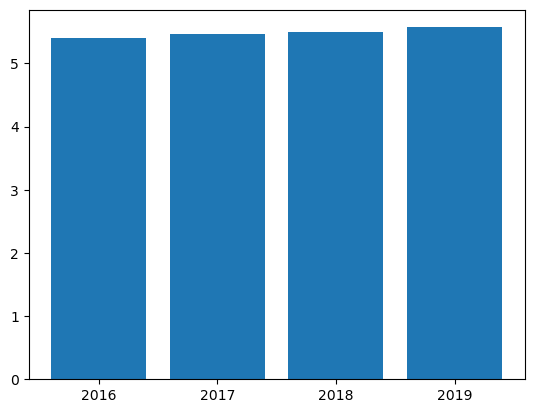

In [36]:
# plot test 

x_axis = whr_clean_df
y_axis = pre_covid["Hapiness Score"]
plt.bar(x_axis, y_axis)
plt.xticks(pre_covid.index)
plt.show()

In [19]:
# read the depression file 
depression_df = pd.read_csv("../Resources/depression-rates-by-country-2023.csv")
depression_df.head()

,country,prevalence,cases,pop2023
0,Ukraine,6.3,2800587,36744634.0
1,United States,5.9,17491047,339996563.0
2,Australia,5.9,1318599,26439111.0
3,Estonia,5.9,75667,1322765.0
4,Brazil,5.8,11548577,216422446.0


In [21]:
# rename columns 
depression_df.columns = ["Country", "% of Pop with Depression", "Cases", "Pop-2023"]
depression_df

,Country,% of Pop with Depression,Cases,Pop-2023
0,Ukraine,6.3,2800587,36744634.0
1,United States,5.9,17491047,339996563.0
2,Australia,5.9,1318599,26439111.0
3,Estonia,5.9,75667,1322765.0
4,Brazil,5.8,11548577,216422446.0
...,...,...,...,...
175,Kiribati,3.1,3452,133515.0
176,Micronesia,3.1,3182,115224.0
177,Papua New Guinea,3.0,223094,10329931.0
178,Timor-Leste,3.0,33932,1360596.0
